## **Customer Segmentation with RFM and K-Means Analysis: A Data-Driven Approach for Business Development**

## **1. Business Problem**
**The revenue generated by superstore companies is not yet optimal.** 

The marketing strategies carried out so far have not resulted in good sales conversions. Companies have difficulty in making what actions or strategies to take with all the customers they have. Apart from that, there are many customers who do not make repeat transactions. 


## **2. Data Preparation**

### **2.1 DATA UNDERSTANDING**

**Each row in this dataset informs product purchase transactions carried out by customers in a region. there is information on the quantity of products purchased, product prices, discounts and profits.**

Dictionary:
- Order ID: Unique identifier for each order.
- Customer Name: Name of the customer who placed the order.
- Segment: Customer segment (e.g., Consumer, Corporate).
- Country, State, City: Location details of the customer.
- Category: Product category (e.g., Furniture, Technology).
- Sub-Category: Subdivision of the category.
- Sales: Revenue from the sale.
- Quantity: Number of units sold.
- Discount: Discount applied to the order.
- Profit: Profit earned from the sale.
- Shipping Cost: Cost incurred for shipping the products.
- Order Date: Date the order was placed.
- Ship Mode: Shipping method used.

### **IMPORT PACKAGES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn .preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import datetime as dt
from datetime import timedelta
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

### **READ DATASET**

In [2]:
df = pd.read_excel('Sample_Superstore.xlsx')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### **2.2 Data Cleaning**

**Checking Duplicated Data**

In [3]:
df.duplicated().sum()

0

**Checking Information every Columns**

In [4]:
pd.set_option('display.max_colwidth', None)

listcolumn = []

for col in df.columns:
    listcolumn.append([col,
                       df[col].dtype,
                       df[col].isna().sum(),
                       df[col].nunique(),
                       df[col].unique()])
    
pd.DataFrame(data=listcolumn, columns=['column_name', 'data_type', 'null', 'total_unique', 'uniqe_category'])

,column_name,data_type,null,total_unique,uniqe_category
0,Row ID,int64,0,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,object,0,5009,"[CA-2018-152156, CA-2018-138688, US-2017-108966, CA-2016-115812, CA-2019-114412, CA-2018-161389, US-2017-118983, CA-2016-105893, CA-2016-167164, CA-2016-143336, CA-2018-137330, US-2019-156909, CA-2017-106320, CA-2018-121755, US-2017-150630, CA-2019-107727, CA-2018-117590, CA-2017-117415, CA-2019-120999, CA-2018-101343, CA-2019-139619, CA-2018-118255, CA-2016-146703, CA-2018-169194, CA-2017-115742, CA-2018-105816, CA-2018-111682, CA-2017-135545, US-2017-164175, CA-2016-106376, CA-2018-119823, CA-2018-106075, CA-2019-114440, US-2017-134026, US-2019-118038, US-2016-147606, CA-2018-127208, CA-2016-139451, CA-2017-149734, US-2019-119662, CA-2019-140088, CA-2019-155558, CA-2018-159695, CA-2018-109806, CA-2017-149587, US-2019-109484, CA-2019-161018, CA-2019-157833, CA-2018-149223, CA-2018-158568, CA-2018-129903, US-2017-156867, CA-2019-119004, CA-2017-129476, CA-2019-146780, CA-2018-128867, CA-2016-115259, CA-2017-110457, US-2017-136476, CA-2018-103730, US-2016-152030, US-2016-134614, US-2019-107272, US-2018-125969, US-2019-164147, CA-2018-145583, CA-2018-110366, CA-2019-106180, CA-2019-155376, CA-2017-110744, CA-2016-110072, CA-2018-114489, CA-2018-158834, CA-2017-124919, CA-2017-118948, CA-2016-104269, CA-2018-114104, CA-2018-162733, CA-2017-119697, CA-2018-154508, CA-2018-113817, CA-2016-139892, CA-2016-118962, US-2016-100853, US-2019-152366, US-2017-101511, CA-2017-137225, CA-2016-166191, CA-2016-158274, CA-2018-105018, CA-2016-123260, CA-2018-157000, CA-2017-102281, CA-2017-131457, CA-2016-140004, CA-2019-107720, US-2019-124303, CA-2019-105074, CA-2016-133690, US-2019-116701, ...]"
2,Order Date,datetime64[ns],0,1236,"[2018-11-08 00:00:00, 2018-06-12 00:00:00, 2017-10-11 00:00:00, 2016-06-09 00:00:00, 2019-04-15 00:00:00, 2018-12-05 00:00:00, 2017-11-22 00:00:00, 2016-11-11 00:00:00, 2016-05-13 00:00:00, 2016-08-27 00:00:00, 2018-12-09 00:00:00, 2019-07-16 00:00:00, 2017-09-25 00:00:00, 2018-01-16 00:00:00, 2017-09-17 00:00:00, 2019-10-19 00:00:00, 2018-12-08 00:00:00, 2017-12-27 00:00:00, 2019-09-10 00:00:00, 2018-07-17 00:00:00, 2019-09-19 00:00:00, 2018-03-11 00:00:00, 2016-10-20 00:00:00, 2018-06-20 00:00:00, 2017-04-18 00:00:00, 2018-12-11 00:00:00, 2018-06-17 00:00:00, 2017-11-24 00:00:00, 2017-04-30 00:00:00, 2016-12-05 00:00:00, 2018-06-04 00:00:00, 2018-09-18 00:00:00, 2019-09-14 00:00:00, 2017-04-26 00:00:00, 2019-12-09 00:00:00, 2016-11-26 00:00:00, 2016-10-12 00:00:00, 2017-09-03 00:00:00, 2019-11-13 00:00:00, 2019-05-28 00:00:00, 2019-10-26 00:00:00, 2018-04-05 00:00:00, 2018-09-17 00:00:00, 2017-01-31 00:00:00, 2019-11-06 00:00:00, 2019-11-09 00:00:00, 2019-06-17 00:00:00, 2018-09-06 00:00:00, 2018-08-29 00:00:00, 2018-12-01 00:00:00, 2017-11-13 00:00:00, 2019-11-23 00:00:00, 2017-10-15 00:00:00, 2019-12-25 00:00:00, 2018-11-03 00:00:00, 2016-08-25 00:00:00, 2017-03-02 00:00:00, 2017-04-05 00:00:00, 2016-12-26 00:00:00, 2016-09-20 00:00:00, 2019-11-05 00:00:00, 2018-11-06 00:00:00, 2019-02-02 00:00:00, 2018-10-13 00:00:00, 2018-09-05 00:00:00, 2019-09-18 00:00:00, 2019-12-22 00:00:00, 2017-09-07 00:00:00, 2016-10-22 00:00:00, 2018-03-13 00:00:00, 2017-05-31 00:00:00, 2017-05-28 00:00:00, 2016-03-01 00:00:00, 2018-11-20 00:00:00, 2018-05-11 00:00:00, 2017-12-28 00:00:00, 2018-11-16 00:00:00, 2018-11-07 00:00:00, 2016-09-08 00:00:00, 2016-08-05 00:00:00, 2016-09-14 00:00:00, 2019-04-21 00:00:00, 2017-11-21 00:00:00, 2017-12-15 00:00:00, 2016-11-19 00:00:00, 2018-11-28 00:00:00, 2016-08-26 00:00:00, 2018-07-16 00:00:00, 2017

**from checking every columns above, we get information:**
- Every column has suitable data types.
- There is missing value 11 rows in Postal Code Column.
- Drop column Row ID, Postal Code, Ship Mode because it's not needed in further analysis (customer segmentation analysis).

**Drop unneeded column.**

In [5]:
df.drop(columns=['Row ID','Postal Code', 'Ship Mode'], inplace=True)

**Summary of descrtiptive Statistics**

In [6]:
df.describe()

,Order Date,Ship Date,Sales,Quantity,Discount,Profit
count,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
mean,2018-04-30 10:03:51.979187712,2018-05-04 09:03:29.645787392,229.858001,3.789574,0.156203,28.656896
min,2016-01-03 00:00:00,2016-01-07 00:00:00,0.444000,1.000000,0.000000,-6599.978000
25%,2017-05-23 00:00:00,2017-05-27 00:00:00,17.280000,2.000000,0.000000,1.728750
50%,2018-06-26 00:00:00,2018-06-29 00:00:00,54.490000,3.000000,0.200000,8.666500
75%,2019-05-14 00:00:00,2019-05-18 00:00:00,209.940000,5.000000,0.200000,29.364000
max,2019-12-30 00:00:00,2020-01-05 00:00:00,22638.480000,14.000000,0.800000,8399.976000
std,NaN,NaN,623.245101,2.225110,0.206452,234.260108


- there is a negative value in column profit. It happens because the company gives a high discount for a certain item.
- The highest sales record in $ 22638.48.
- The highest total quantity recorded in customer transactions is 14 qty.
- recent history transactions date happens in December, 30th 2019.

## **3. EDA**

**Sales by Year**

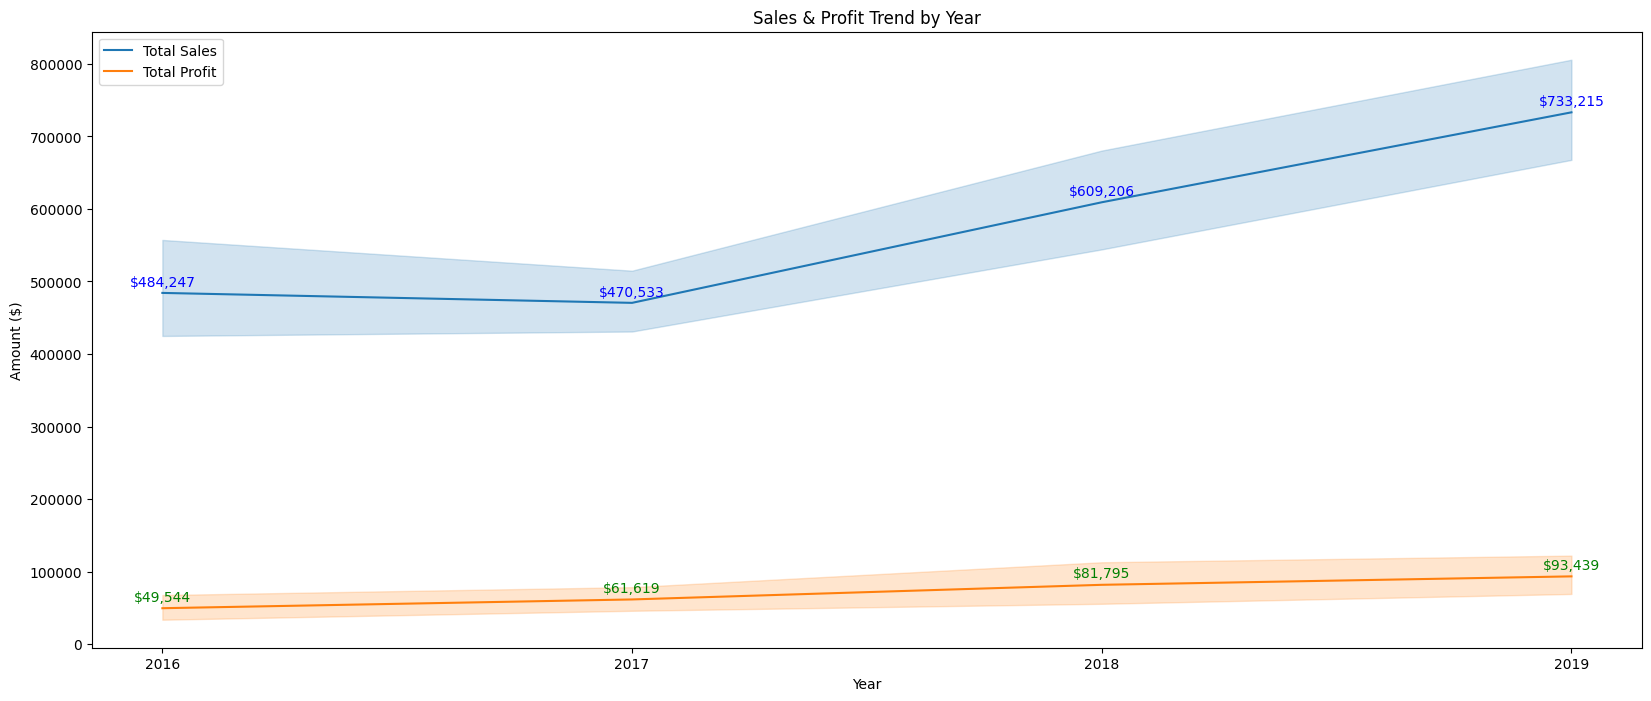

In [7]:
sales=df[['Sales','Profit','Order Date']]
sales['Order Date'] = sales['Order Date'].dt.year
sales['Order Date'].value_counts()

plt.figure(figsize=(20,8))
sales_plot = sns.lineplot(sales,
             x='Order Date',
             y='Sales',
             label='Total Sales',
             estimator='sum')

sales_agg = sales.groupby('Order Date')['Sales'].sum().reset_index()
for i in range(sales_agg.shape[0]):
    sales_plot.annotate(f"${sales_agg['Sales'].iloc[i]:,.0f}",
                        (sales_agg['Order Date'].iloc[i], sales_agg['Sales'].iloc[i]),
                        textcoords="offset points", xytext=(0,5), ha='center', fontsize=10, color='blue')


profit_plot = sns.lineplot(sales,
             x='Order Date',
             y='Profit',
             label='Total Profit',
             estimator='sum')

profit_agg = sales.groupby('Order Date')['Profit'].sum().reset_index()
for i in range(profit_agg.shape[0]):
    profit_plot.annotate(f"${profit_agg['Profit'].iloc[i]:,.0f}",
                         (profit_agg['Order Date'].iloc[i], profit_agg['Profit'].iloc[i]),
                         textcoords="offset points", xytext=(0,5), ha='center', fontsize=10, color='green')

plt.xticks(sales['Order Date'].unique())
plt.title('Sales & Profit Trend by Year')
plt.ylabel('Amount ($)')
plt.xlabel('Year')
plt.show()

In [8]:
total_sales = sales_agg['Sales'].sum()
total_profit = profit_agg['Profit'].sum()

print(f'Total sales over the past four year: $ {total_sales}')
print(f'Total profit over the past four year: $ {total_profit}')
print(f'Average discount over past four year : {df['Discount'].mean()}')

Total sales over the past four year: $ 2297200.8603
Total profit over the past four year: $ 286397.0216999999
Average discount over past four year : 0.15620272163297977


Over the last 4 years, there has been an increase in sales from 2016 - 2019. A significant increase in sales occurred in 2017 - 2019. Apart from that, profits also increased from year to year. Total sales for the last 4 years were $ 2.3 M and made a profit of $286.39K. The company's average discount was 15.62%, indicating that the profit margin may have been impacted by the discounting approach.

**Region, State and City Performance**

In [9]:
order_region = pd.pivot_table(df,
               index='Region',
               columns='Category',
               values='Order ID',
               aggfunc='count')

order_region['Total Order'] = order_region.sum(axis=1)
order_region = order_region.sort_values(by='Total Order', ascending=False)

sales_region = pd.pivot_table(df,
               index='Region',
               columns='Category',
               values='Sales',
               aggfunc='sum')

sales_region['Total Sales'] = sales_region.sum(axis=1)
sales_region = sales_region.sort_values(by='Total Sales', ascending=False)

display(sales_region, order_region)


Category,Furniture,Office Supplies,Technology,Total Sales
Region,,,,
West,252612.7435,220853.249,251991.832,725457.8245
East,208291.2040,205516.055,264973.981,678781.2400
Central,163797.1638,167026.415,170416.312,501239.8908
South,117298.6840,125651.313,148771.908,391721.9050


Category,Furniture,Office Supplies,Technology,Total Order
Region,,,,
West,707,1897,599,3203
East,601,1712,535,2848
Central,481,1422,420,2323
South,332,995,293,1620


In [10]:
region_sales = df.groupby(by='Region').agg(Total_Sales=('Sales', 'sum')).sort_values('Total_Sales', ascending=False).reset_index()
region_order = df.groupby(by='Region').agg(Total_Order=('Order ID', 'count')).sort_values('Total_Order', ascending=False).reset_index()


In [11]:
display(region_sales, region_order)

,Region,Total_Sales
0,West,725457.8245
1,East,678781.2400
2,Central,501239.8908
3,South,391721.9050


,Region,Total_Order
0,West,3203
1,East,2848
2,Central,2323
3,South,1620


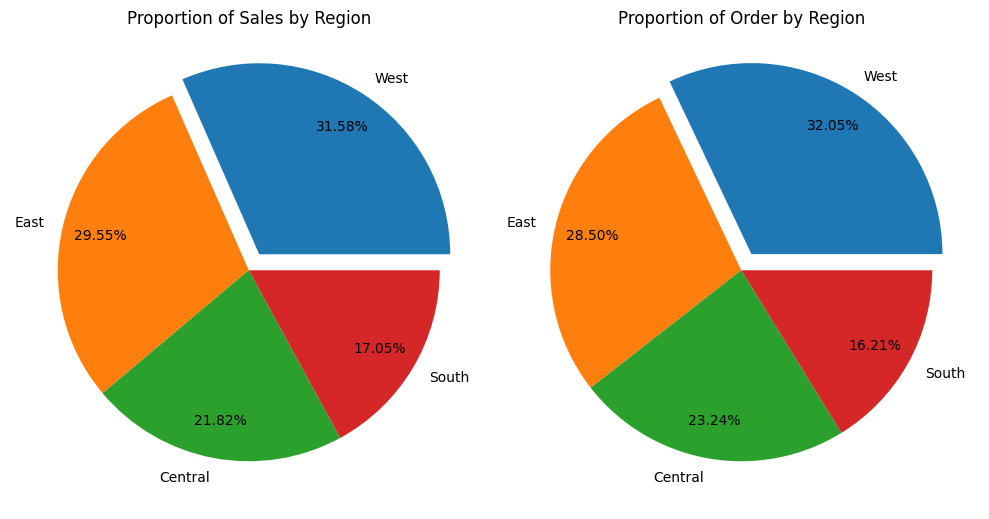

In [12]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.pie(x=region_sales['Total_Sales'],
        labels = region_sales['Region'],
        pctdistance=0.8, 
        autopct='%1.2f%%', 
        explode=(0.1,0,0,0)
        )
plt.title('Proportion of Sales by Region')
plt.tight_layout()

plt.subplot(1,2,2)
plt.pie(x=region_order['Total_Order'],
        labels = region_sales['Region'],
        pctdistance=0.8, 
        autopct='%1.2f%%', 
        explode=(0.1,0,0,0)
        )
plt.title('Proportion of Order by Region')
plt.tight_layout()




plt.show()

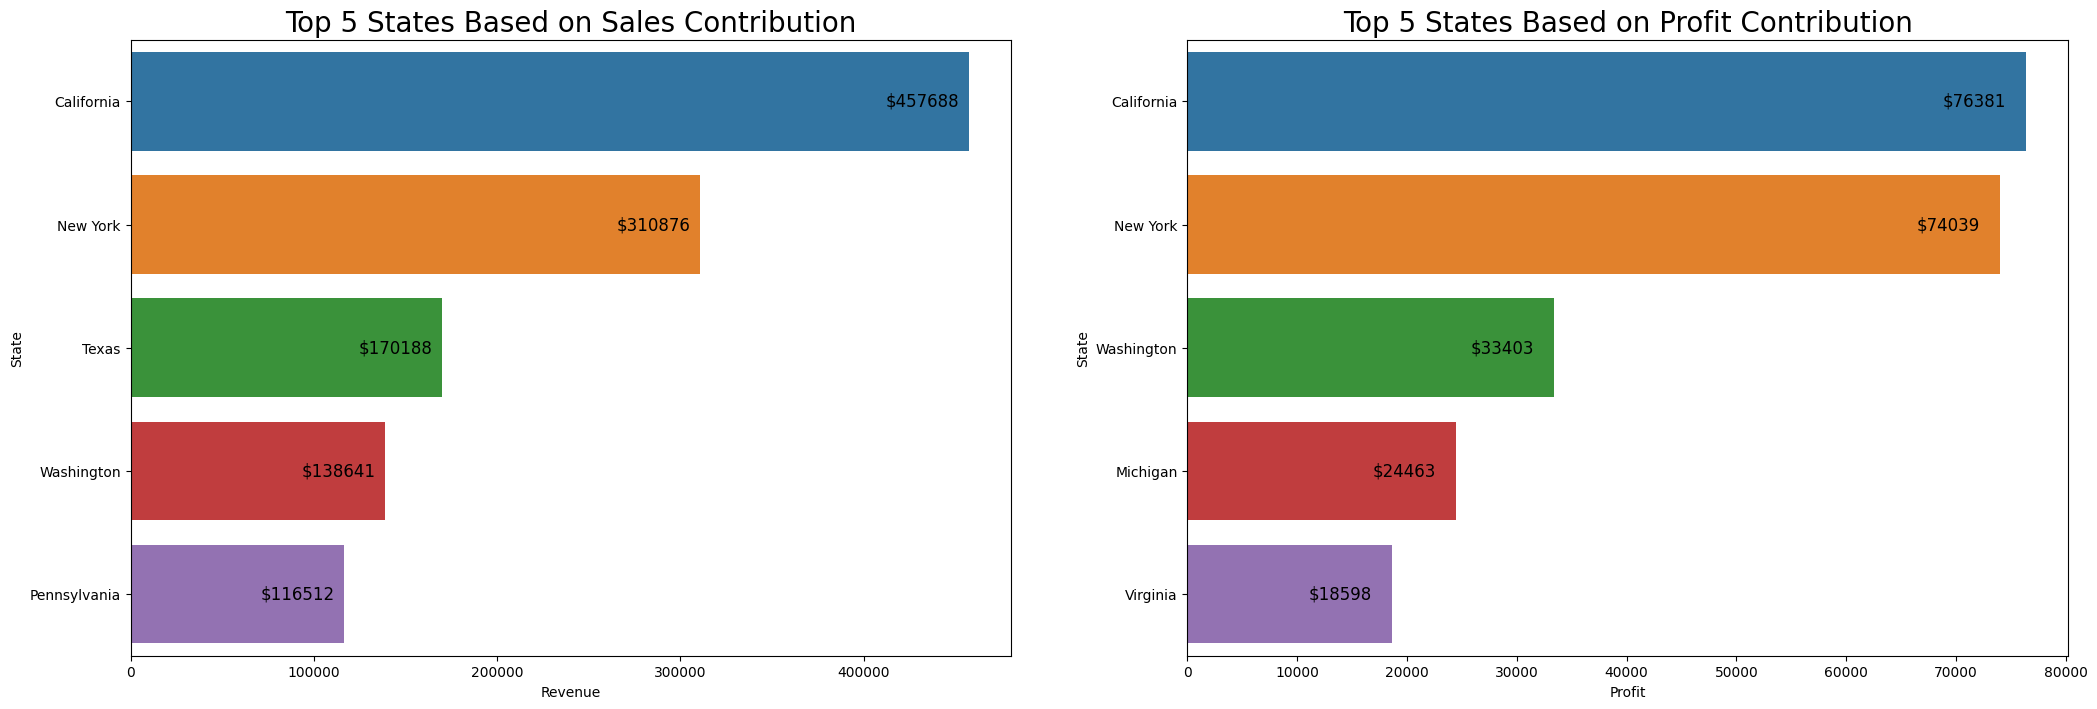

In [13]:
plt.figure(figsize=(25,8))
top5state_sales = df.groupby(by='State', as_index=False)[['Sales']].sum().sort_values(by='Sales', ascending=False).head(5)

plt.subplot(1,2,1)
top5state_sales = sns.barplot(top5state_sales, 
                            x='Sales', 
                            y='State',
                            ci=0,
                            palette='tab10',
                            estimator='sum')

for bar in top5state_sales.patches:
    top5state_sales.annotate('$'+format(bar.get_width(), '.0f'),
                           (bar.get_width(), 
                            bar.get_y() + bar.get_height() / 2), 
                           ha='left', va='center', 
                           size=12, xytext=(-60, 0), 
                           textcoords='offset points')

plt.title('Top 5 States Based on Sales Contribution', fontsize=20)
plt.xlabel('Revenue')
plt.ylabel('State')

top5state_profit = df.groupby(by='State', as_index=False)[['Profit']].sum().sort_values(by='Profit', ascending=False).head(5)

plt.subplot(1,2,2)
top5state_profit = sns.barplot(top5state_profit, 
                            x='Profit', 
                            y='State',
                            ci=0,
                            palette='tab10',
                            estimator='sum')

for bar in top5state_profit.patches:
    top5state_profit.annotate('$'+format(bar.get_width(), '.0f'),
                           (bar.get_width(), 
                            bar.get_y() + bar.get_height() / 2), 
                           ha='left', va='center', 
                           size=12, xytext=(-60, 0), 
                           textcoords='offset points')

plt.title('Top 5 States Based on Profit Contribution', fontsize=20)
plt.xlabel('Profit')
plt.ylabel('State')
plt.show()

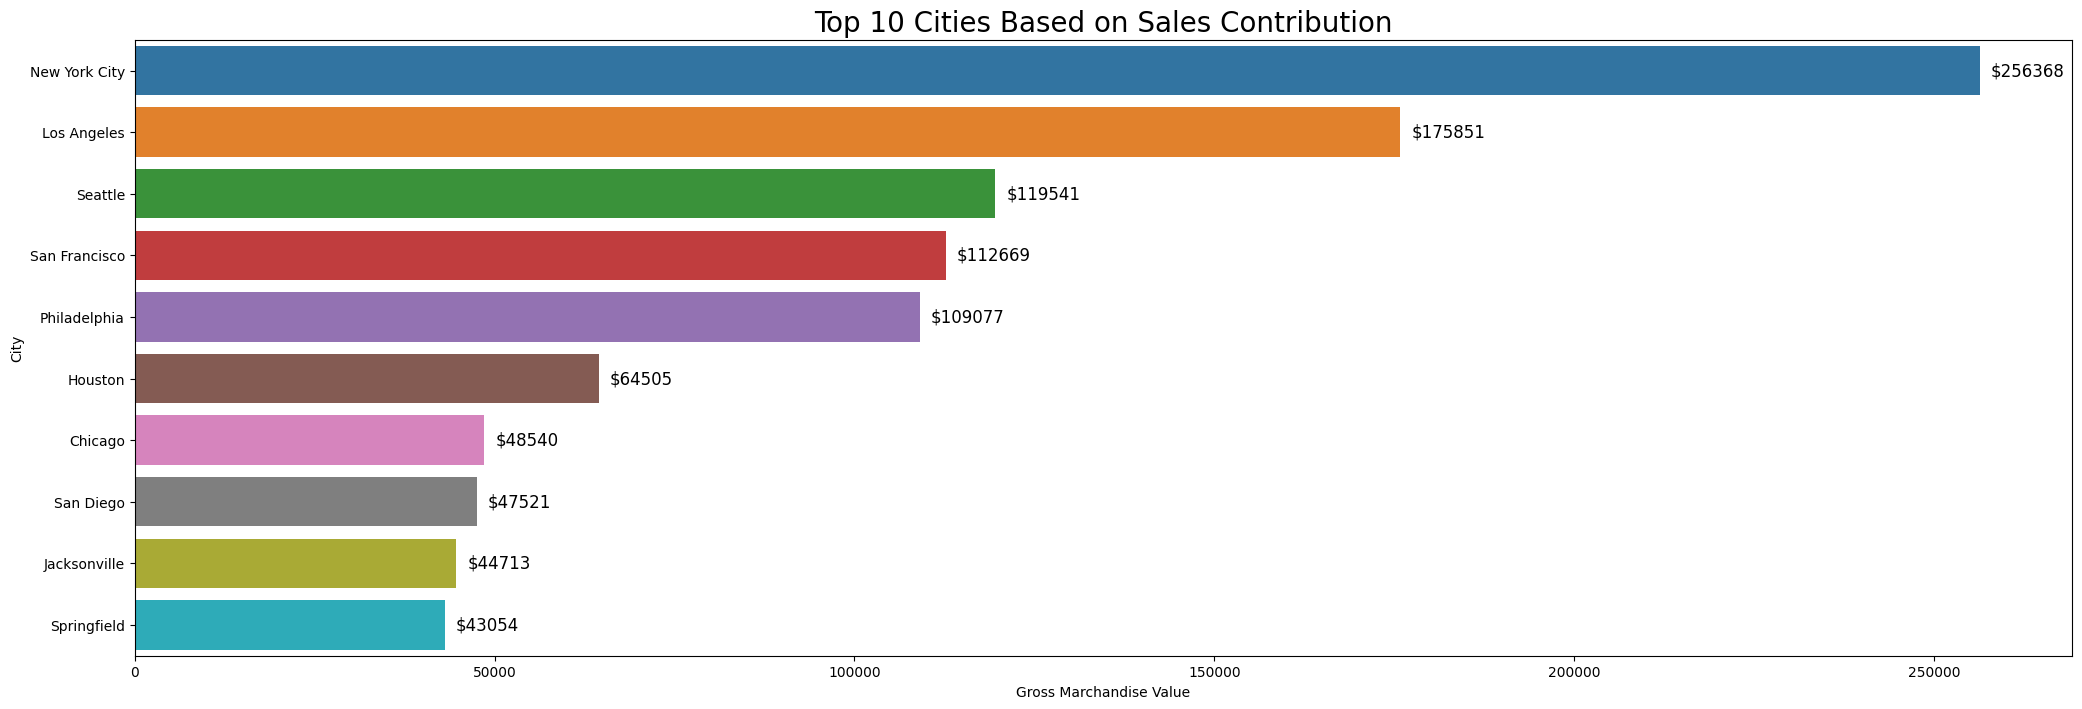

In [14]:
plt.figure(figsize=(25,8))
top10cities = df.groupby(by='City', as_index=False)[['Sales']].sum().sort_values(by='Sales', ascending=False).head(10)

top10cities = sns.barplot(top10cities, 
                            x='Sales', 
                            y='City',
                            ci=0,
                            palette='tab10')

for bar in top10cities.patches:
    top10cities.annotate('$' + format(bar.get_width(), '.0f'),
                           (bar.get_width(), 
                            bar.get_y() + bar.get_height() / 2), 
                           ha='left', va='center', 
                           size=12, xytext=(8, 0), 
                           textcoords='offset points')

plt.title('Top 10 Cities Based on Sales Contribution', fontsize=20)
plt.xlabel('Gross Marchandise Value')
plt.ylabel('City')
plt.show()

With sales and transactions totaling $725K and 3203 transaction, the West Region  led the way. The West Region contributes 31.58% of sales and 32.05% of transactions to the overall sales and transactions made by superstores. The east region holds the second place, while the central region has the third position. These three regions are represented by the top 5 state performances. The states of Texas represent the central region, New York and Pennsylvania represent the east region, California and Washington represent the West region.

**Product Category & Product Name Performances**

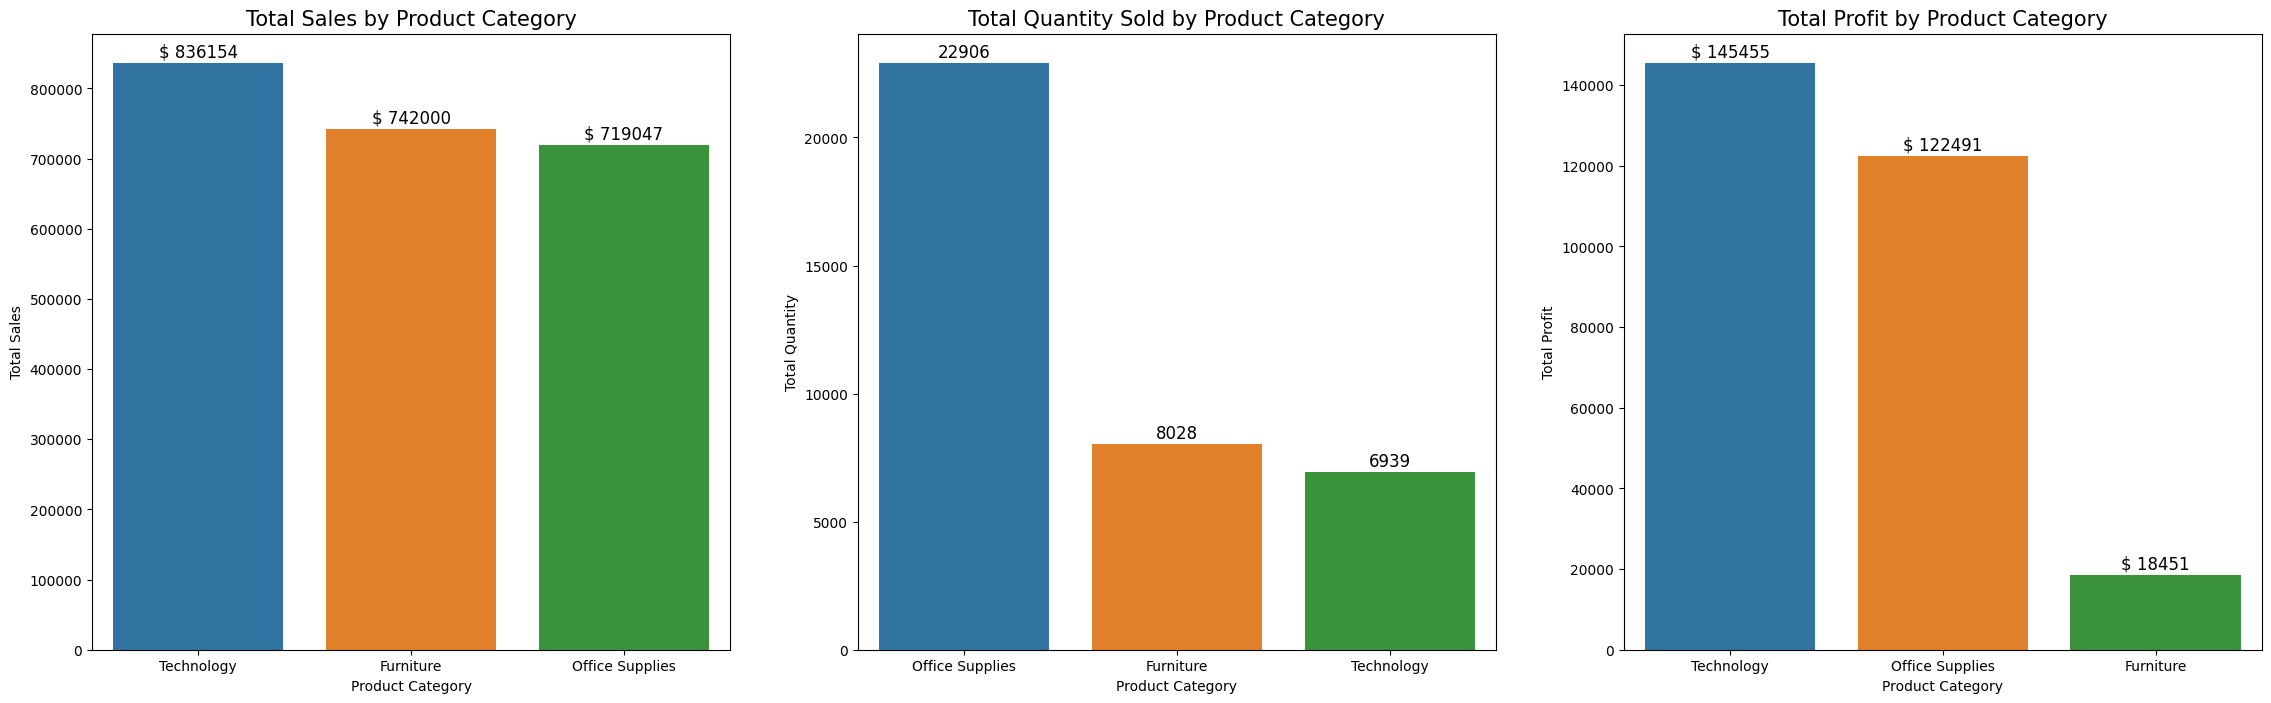

In [15]:
plt.figure(figsize=(28,8))

plt.subplot(1,3,1)
topcat_sales = df.groupby(by='Category',as_index=False)[['Sales']].sum().sort_values('Sales',ascending=False)
topcat_sales = sns.barplot(topcat_sales,
                     x= 'Category',
                     y= 'Sales',
                     ci=0,
                     palette='tab10')

for bar in topcat_sales.patches:
    topcat_sales.annotate('$' + ' ' + format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.title('Total Sales by Product Category', fontsize=15)
plt.xlabel('Product Category')
plt.ylabel('Total Sales')

plt.subplot(1,3,2)
topcat_qty = df.groupby(by='Category')[['Quantity']].sum().sort_values('Quantity', ascending=False)
topcat_qty = sns.barplot(topcat_qty,
                         x= 'Category',
                         y= 'Quantity',
                         ci=10,
                         palette='tab10')

for bar in topcat_qty.patches:
    topcat_qty.annotate(format(bar.get_height(), '.0f'),
                        (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
    
plt.title('Total Quantity Sold by Product Category', fontsize=15)
plt.ylabel('Total Quantity')
plt.xlabel('Product Category')

plt.subplot(1,3,3)
topcat_profit = df.groupby(by='Category')[['Profit']].sum().sort_values('Profit', ascending=False)
topcat_profit = sns.barplot(topcat_profit,
                            x='Category',
                            y='Profit',
                            ci=0,
                            palette='tab10')
for bar in topcat_profit.patches:
    topcat_profit.annotate( '$'+ ' ' + format(bar.get_height(), '.0f'),
                        (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
    
plt.title('Total Profit by Product Category', fontsize=15)
plt.ylabel('Total Profit')
plt.xlabel('Product Category')
plt.show()

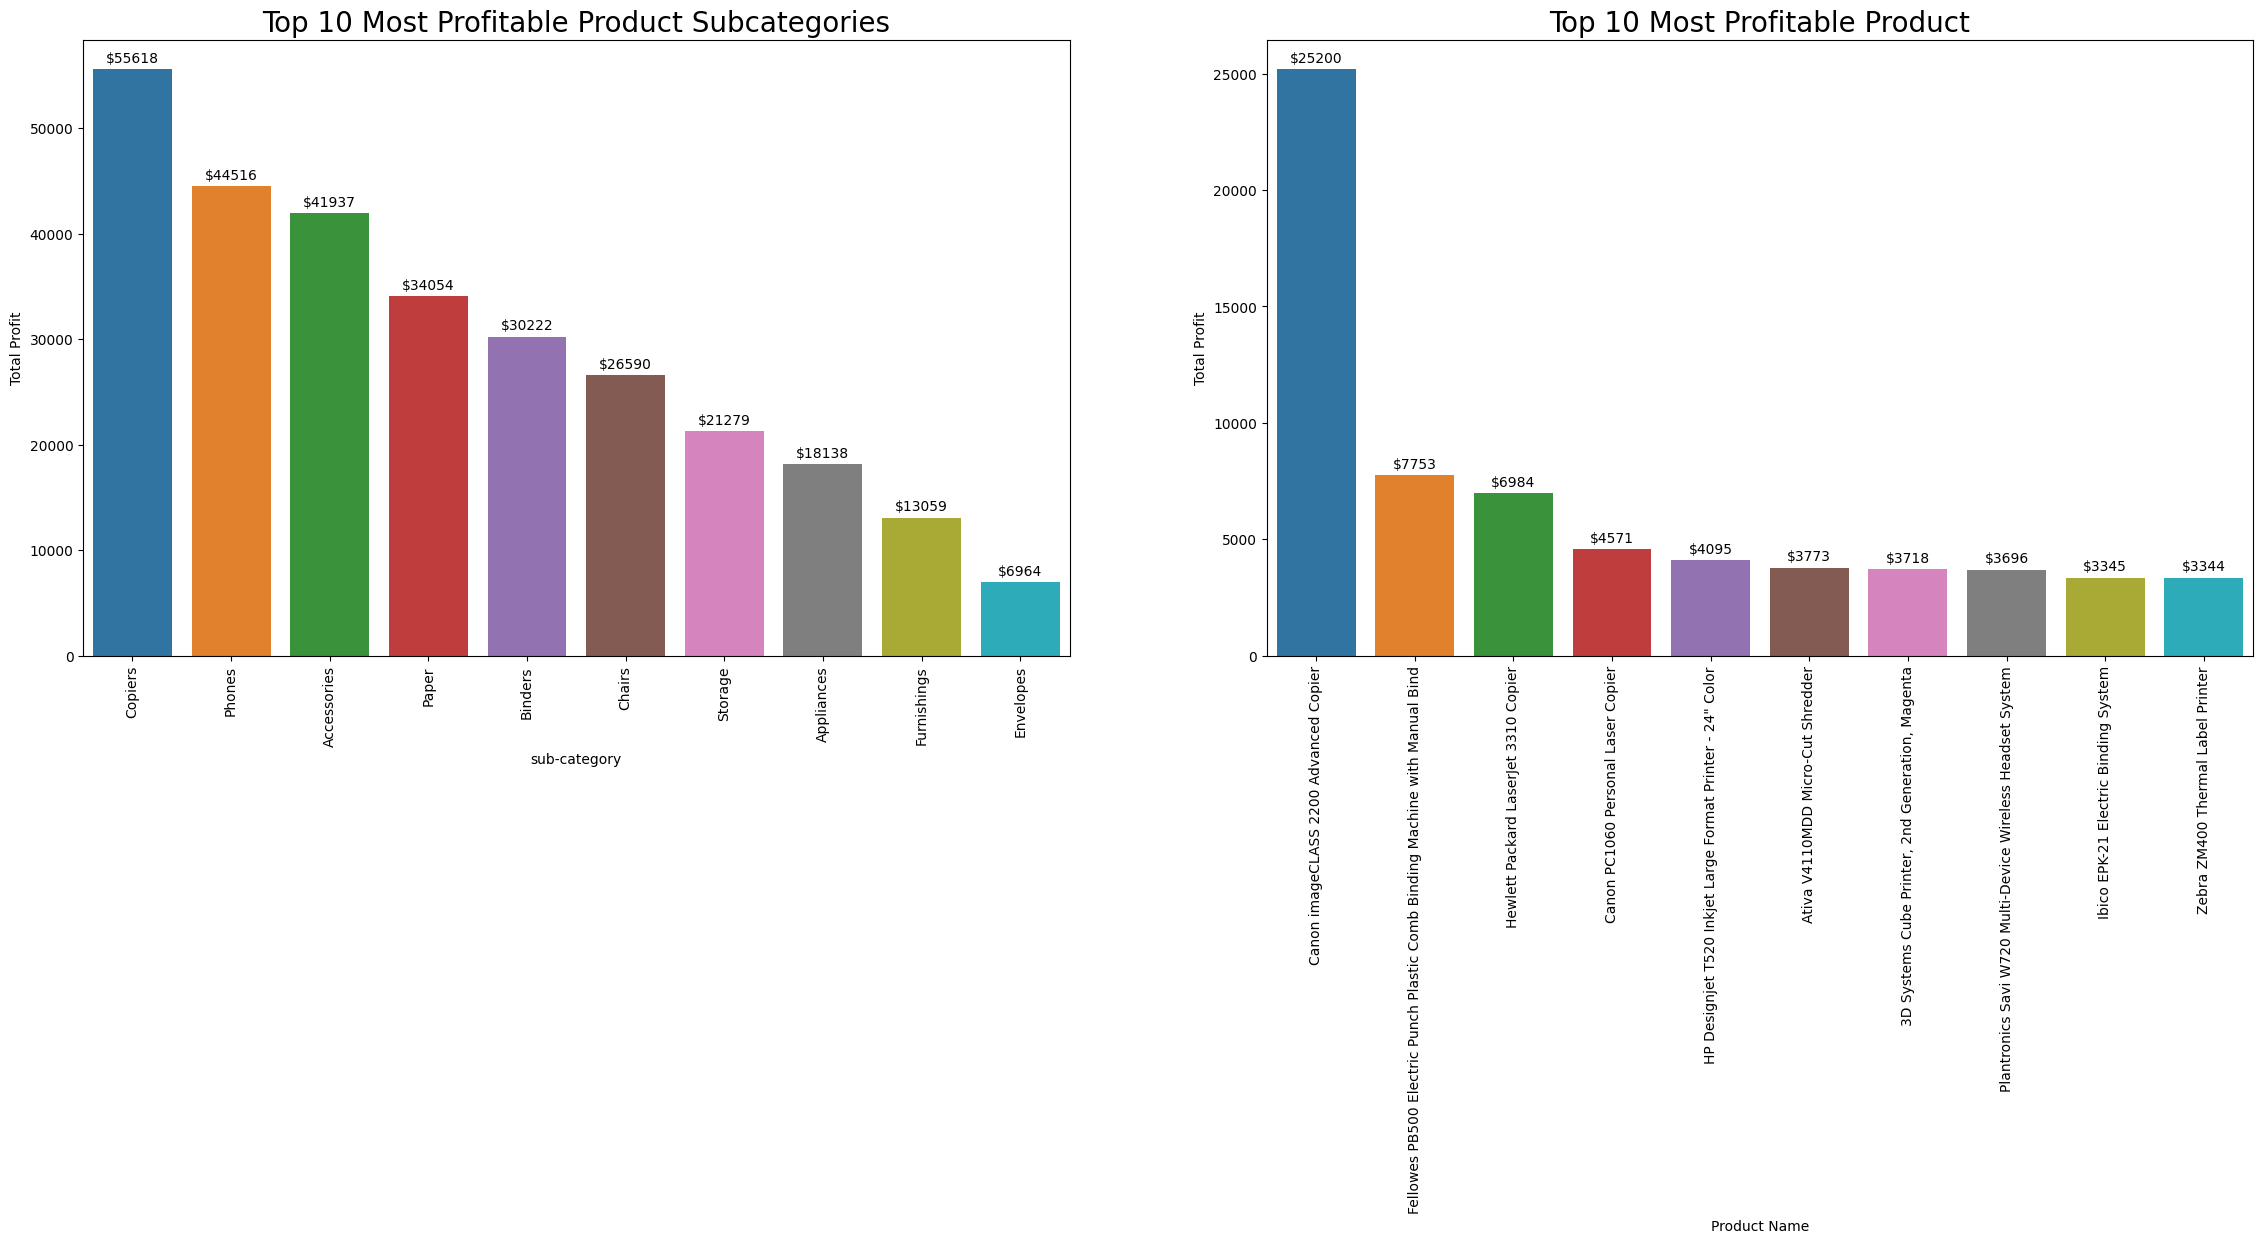

In [16]:
plt.figure(figsize=(28,8))

topsubcat = df.groupby(by='Sub-Category')[['Profit']].sum().sort_values(by='Profit',ascending=False).head(10)
plt.subplot(1,2,1)
topsubcat = sns.barplot(topsubcat,
                       x='Sub-Category',
                       y='Profit',
                       ci=0,
                       palette='tab10')

for bar in topsubcat.patches:
    topsubcat.annotate('$' + format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.title('Top 10 Most Profitable Product Subcategories', fontsize=20)
plt.xlabel('sub-category')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)

topproduct = df.groupby(by='Product Name', as_index=False)[['Profit']].sum().sort_values(by='Profit',ascending=False).head(10)
plt.subplot(1,2,2)
topproduct = sns.barplot(topproduct,
                         x='Product Name',
                         y= 'Profit',
                         ci=0,
                         palette='tab10')

for bar in topproduct.patches:
    topproduct.annotate('$' + format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.title('Top 10 Most Profitable Product', fontsize=20)
plt.xlabel('Product Name')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.show()


**Low Products with Average Negative Profit (Loss)**

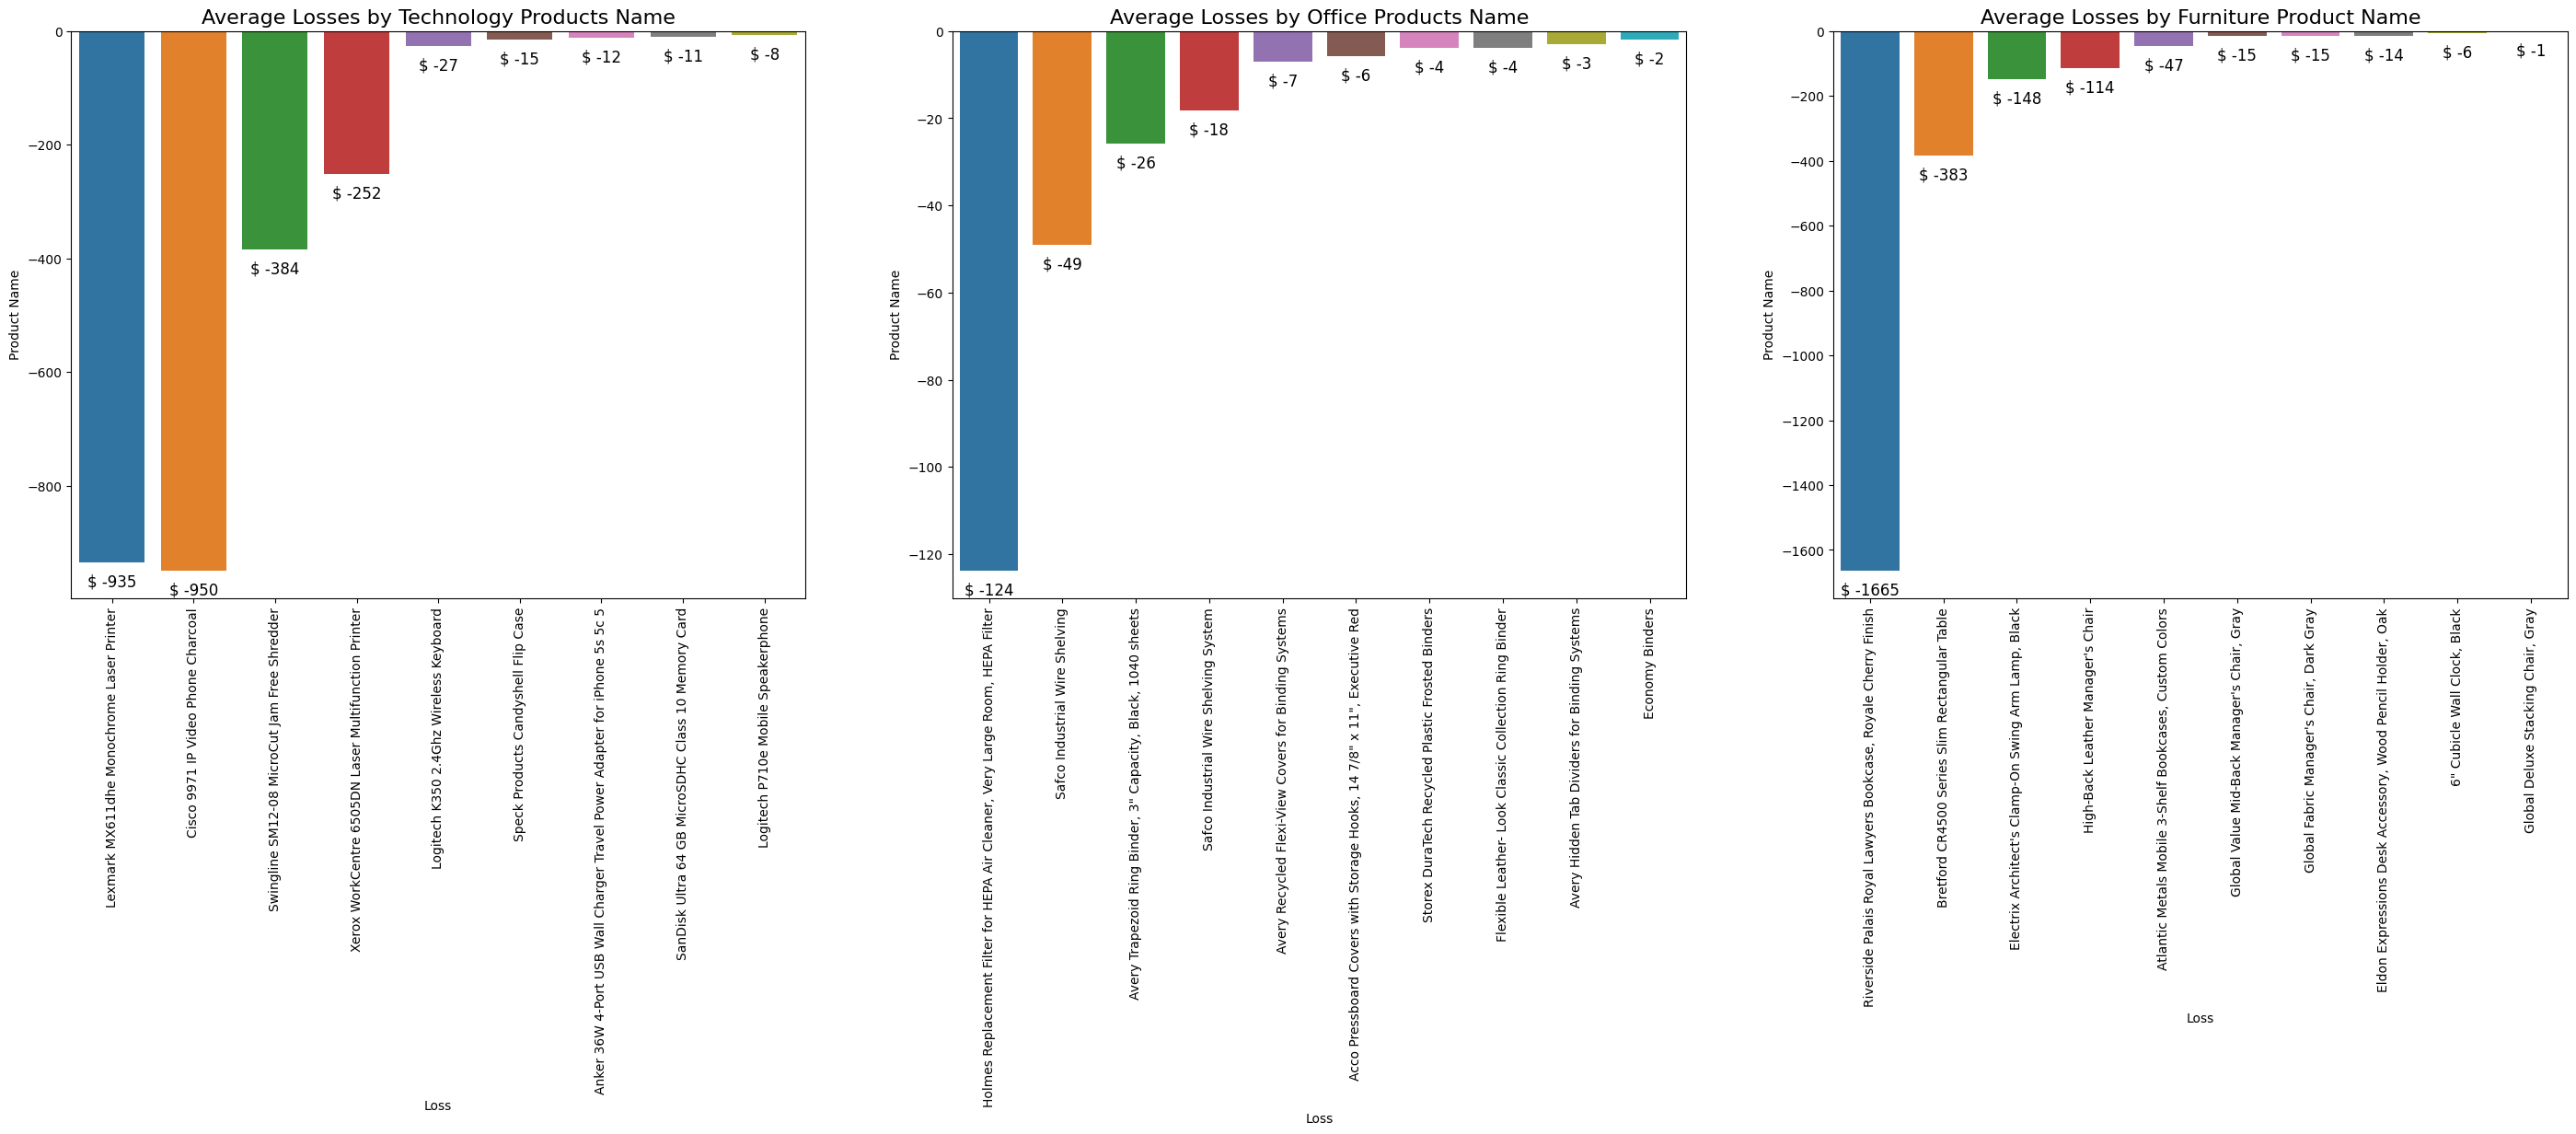

In [17]:
loss = df[df['Profit'] < 0]

plt.figure(figsize=(35,8))

plt.subplot(1,3,1)
loss_tech = loss[loss['Category'] == 'Technology']
loss_tech = sns.barplot(loss_tech.head(10).sort_values(by='Profit',ascending=True),
                        x='Product Name',
                        y='Profit',
                        ci=0,
                        palette='tab10',
                        estimator='mean')

for bar in loss_tech.patches:
    loss_tech.annotate( '$'+ ' ' + format(bar.get_height(), '.0f'),
                        (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, -15),
                   textcoords='offset points')

plt.title("Average Losses by Technology Products Name", fontsize=16)
plt.xlabel("Loss")
plt.xticks(rotation=90)
plt.ylabel("Product Name")

plt.subplot(1,3,2)
loss_office = loss[loss['Category'] == 'Office Supplies']
loss_office = sns.barplot(loss_office.head(10).sort_values(by='Profit',ascending=True),
                        x='Product Name',
                        y='Profit',
                        ci=0,
                        palette='tab10',
                        estimator='mean')

for bar in loss_office.patches:
    loss_office.annotate( '$'+ ' ' + format(bar.get_height(), '.0f'),
                        (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, -15),
                   textcoords='offset points')

plt.title("Average Losses by Office Products Name", fontsize=16)
plt.xlabel("Loss")
plt.xticks(rotation=90)
plt.ylabel("Product Name")


plt.subplot(1,3,3)
loss_furniture = loss[loss['Category'] == 'Furniture']
loss_furniture = sns.barplot(loss_furniture.head(10).sort_values(by='Profit',ascending=True),
                        x='Product Name',
                        y='Profit',
                        ci=0,
                        palette='tab10',
                        estimator='mean')

for bar in loss_furniture.patches:
    loss_furniture.annotate( '$'+ ' ' + format(bar.get_height(), '.0f'),
                        (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, -15),
                   textcoords='offset points')

plt.title("Average Losses by Furniture Product Name", fontsize=16)
plt.xlabel("Loss")
plt.xticks(rotation=90)
plt.ylabel("Product Name")
plt.show()

Although the technology product category recorded the smallest sales quantity, it produced a very impressive performance by ranking first in sales at $836K and profits of $145K. The Copiers and Phone product sub-category has the largest contribution to the sales and profits earned by the technology product category. The Furniture category holds the second place, while the office supplies have the third position.

Even though profits are increasing annually, the business has suffered a number of losses. This is because the business offers discounts on a number of items in the sectors of office supplies, furniture, and technology. In my opinion, this is done as part of a strategy to obtain long-term benefits such as:
- Attract new customers.
- Increase customer loyalty.
- Increase sales volume.
- Reduce stock inventory.


**Customer Segments.**

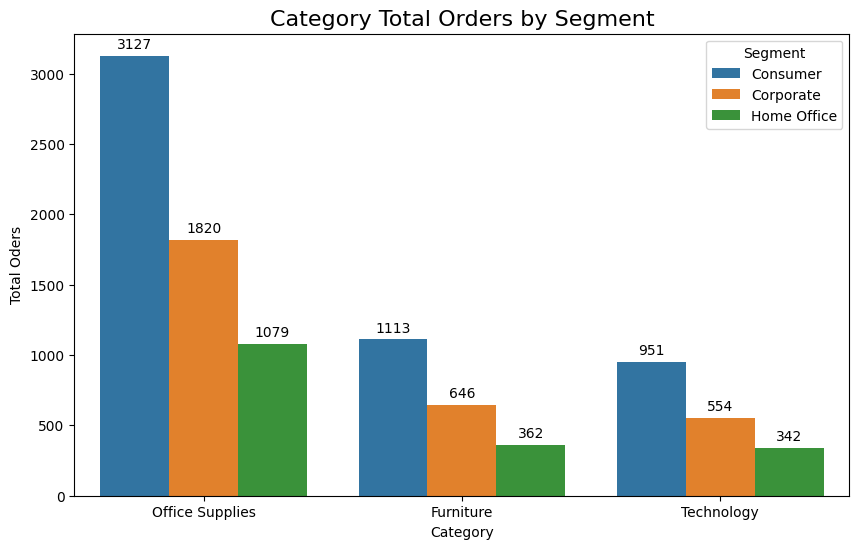

In [18]:
plt.figure(figsize=(10,6))

segment =df.groupby(['Category','Segment'], as_index=False).agg(Total_Order=('Order ID', 'count')).sort_values(by='Total_Order', ascending=False)
segment = sns.barplot(segment,
            x='Category',
            y='Total_Order',
            ci=0,
            estimator='sum',
            palette='tab10',
            hue='Segment')

for bar in segment.patches:
    height = bar.get_height()  # Get the height of the bar
    if height > 0:  # Only annotate bars with non-zero height
        segment.annotate(format(height, '.0f'),
                       (bar.get_x() + bar.get_width() / 2,
                        height), ha='center', va='center',
                       size=10, xytext=(0, 8),
                       textcoords='offset points')
    
plt.title("Category Total Orders by Segment", fontsize=16)
plt.xlabel("Category")
plt.ylabel("Total Oders")
plt.show()

From three product categories (office supplies, Furniture and Technology), consumer has the largest order of customer segment, which means this company has a larger B2C market share compared to B2B. it is better for the company to organize a suitable marketing campaign for business to consumer and business to business to increase sales.

## **How to Solve the Business Problem**

1. Grouping customers based on shopping behavior using Recency, frequency and monetary metrics.
2. Create more personal and relevant marketing campaigns based on customer segments.
2. Design loyalty programs that reward customers based on their level of shopping behavior and loyalty.

### **Customer Segmentation Using RFM Analysis and K-Means**

### **1. Calculate RFM Metrics**

**Recency**--> refers to how recently a customer has made a purchase from the company.
- Define Current Data : Because we use a dummy data. Current Date is a maximum Order date + 1 day.

In [19]:

current_date = df['Order Date'].max() + timedelta(days=1)
current_date

Timestamp('2019-12-31 00:00:00')

In [20]:
# Grouping based on last order date.

recency_df = df.groupby(['Customer ID'],as_index=False)['Order Date'].max()
recency_df.columns = ['Customer_ID','LastPurchaseDate']
recency_df.head()

,Customer_ID,LastPurchaseDate
0,AA-10315,2019-06-29
1,AA-10375,2019-12-11
2,AA-10480,2019-04-15
3,AA-10645,2019-11-05
4,AB-10015,2018-11-10


In [21]:
# Calculate Last day of customer transaction.
recency_df['Recency'] = recency_df.LastPurchaseDate.apply(lambda x : (current_date - x).days)
recency_df.head()

,Customer_ID,LastPurchaseDate,Recency
0,AA-10315,2019-06-29,185
1,AA-10375,2019-12-11,20
2,AA-10480,2019-04-15,260
3,AA-10645,2019-11-05,56
4,AB-10015,2018-11-10,416


**Frequency** --> how often a customer makes purchases

In [22]:
frequency_df = df.groupby('Customer ID',as_index=False)['Order ID'].count()
frequency_df.columns = ['Customer_ID','Frequency']
frequency_df.head()

,Customer_ID,Frequency
0,AA-10315,11
1,AA-10375,15
2,AA-10480,12
3,AA-10645,18
4,AB-10015,6


**Monetary** --> How much money a customer has spent

In [23]:
monetary_df=df.groupby('Customer ID',as_index=False)['Sales'].sum()
monetary_df.columns = ['Customer_ID','Monetary']
monetary_df.head()

,Customer_ID,Monetary
0,AA-10315,5563.560
1,AA-10375,1056.390
2,AA-10480,1790.512
3,AA-10645,5086.935
4,AB-10015,886.156


**Merge Recency, Frequency and Monetary Metrics**

In [24]:
#combine first recency and frequency
rf = recency_df.merge(frequency_df,left_on='Customer_ID',right_on='Customer_ID')

#combibe rf frame with monetary values
rfm = rf.merge(monetary_df,left_on='Customer_ID',right_on='Customer_ID')
rfm.set_index('Customer_ID',inplace=True)
rfm.head()

,LastPurchaseDate,Recency,Frequency,Monetary
Customer_ID,,,,
AA-10315,2019-06-29,185,11,5563.560
AA-10375,2019-12-11,20,15,1056.390
AA-10480,2019-04-15,260,12,1790.512
AA-10645,2019-11-05,56,18,5086.935
AB-10015,2018-11-10,416,6,886.156


In [25]:
rfm.drop(columns=['LastPurchaseDate'],inplace=True)
rfm.head()

,Recency,Frequency,Monetary
Customer_ID,,,
AA-10315,185,11,5563.560
AA-10375,20,15,1056.390
AA-10480,260,12,1790.512
AA-10645,56,18,5086.935
AB-10015,416,6,886.156


**Recency** found from the difference between the current date and the last date of customer transaction. This shows the time range referred to as recency. **Recency** Which high will explain that the buyer has not made a transaction for a long time and vice versa. Whereas **Frequency** found from calculating count of Order ID amount, where each Customer ID can carry out several transactions which will calculate the Order ID. Monetary is the total amount of money spent by customers. Ideally, the best customers reflect low recency values ​​but high frequency and monetary values.

### **2. Relationship between Each Metric**

Since the distribution of data is not normal. we will use spearman method to know the correlation of each metric.

**Monetary vs Frequency**

The correlation between Monetary and Frequency in RFM metrics generally reflects the relationship between how often a customer makes purchases (Frequency) and how much they spend in total (Monetary). Here’s a deeper look:

- Positive Correlation (Expected):
In many cases, there is a positive correlation between Frequency and Monetary. This means that customers who buy more often tend to spend more overall. For example, a customer making frequent purchases is likely to generate higher total sales, which is reflected in the Monetary value.

- High-Frequency Low-Monetary Customers:
There could be customers with high frequency but low monetary value. These are customers who purchase frequently but with smaller transaction amounts. This might occur in businesses where frequent purchases are low-value items (e.g., consumables).

- Low-Frequency High-Monetary Customers:
On the other hand, there could be customers with low frequency but high monetary value. These customers might make fewer purchases but spend a large amount each time (e.g., buying expensive products).

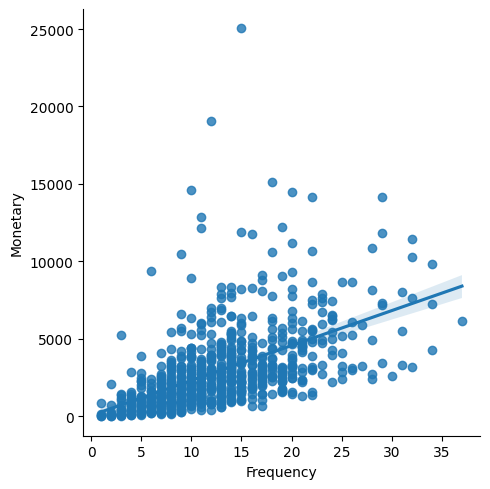

In [26]:
sns.lmplot(x='Frequency', y='Monetary', data=rfm,fit_reg=True)

In [27]:
correlation_fm = rfm['Frequency'].corr(rfm['Monetary'], method='spearman')
print(f"Correlation between Frequency and Monetary: {correlation_fm}")

Correlation between Frequency and Monetary: 0.6683794055496093


Here's how to interpret this result:

- Positive Correlation:
Since the value is positive, it means that as Frequency increases, Monetary tends to increase as well. In other words, customers who make purchases more often are generally spending more overall.

- Strength of the Correlation:
A correlation of 0.6 suggests that there is a moderate relationship between the two variables. It’s not a very strong relationship (which would be closer to 1), but it’s also not weak. There is a notable association between how often a customer buys and how much they spend, but it’s not a perfect or very strong link.

- Practical Implications:
In practical terms, this result could mean that most frequent buyers tend to spend more money overall, but there are still some customers who might make frequent small purchases, or some who purchase infrequently but spend a lot in a single transaction.
This suggests that while Frequency can be a predictor of Monetary value, it may not always be reliable on its own. Other factors (such as the type of products being bought) could also influence the amount customers spend.

**Frequency vs Recency**

The correlation between Frequency and Recency in RFM metrics typically reflects the relationship between how often a customer makes purchases (Frequency) and how recently they made their last purchase (Recency). Here's how to interpret this relationship:

- Expected Correlation (Negative):
Frequency and Recency usually have a negative correlation.
This means that customers who purchase more frequently (high Frequency) tend to have made their last purchase more recently (low Recency), and vice versa.
- Negative Correlation Explained:
    - High Frequency, Low Recency: If a customer buys frequently, they are likely to have made a purchase recently. This leads to a low Recency score (because Recency measures days since the last purchase).
    - Low Frequency, High Recency: If a customer buys infrequently, they probably made their last purchase a long time ago, resulting in a higher Recency score.

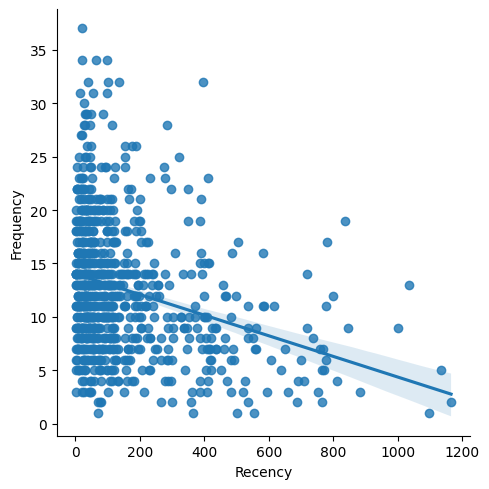

In [28]:
sns.lmplot(x='Recency', y='Frequency', data=rfm,fit_reg=True)

In [29]:
correlation_fr = rfm['Frequency'].corr(rfm['Recency'], method='spearman')
print(f"Correlation between Frequency and Recency: {correlation_fr}")

Correlation between Frequency and Recency: -0.27598550669274874


A correlation of -0.27 between Frequency and Recency indicates a weak negative relationship. There is a slight trend that more frequent buyers have made recent purchases, but it’s not strong enough to be a reliable predictor on its own.

- Interpretation of the result: 
Weak Negative Trend: Customers who have a higher frequency of purchasing might have bought recently, but not necessarily. This could indicate that other factors are influencing customer behavior, such as:
    - Seasonal purchases: Some customers may make frequent purchases during certain times but not recently.
    - Promotional buying: Discounts or offers could influence recent purchases but not necessarily correlate strongly with how often customers buy overall.
    - Business Model Considerations: Some business models, like seasonal or specialized goods, may result in weak correlations between Recency and Frequency.

**Monetary vs Recency**

The correlation between Monetary (the total amount a customer has spent) and Recency (how recently a customer made their last purchase) in RFM metrics can vary, but typically, we might expect it to be weak or negative. Here's why:

- Weak Negative Correlation:
In many cases, there could be a weak negative correlation between Monetary and Recency. Customers who have spent more money (higher Monetary) might have made a recent purchase, so their Recency would be lower (indicating a more recent purchase).
- Potential Zero or No Significant Correlation:
In some businesses, the correlation between Monetary and Recency may not be strong or significant. For example, a high-spending customer might not have made a purchase recently but could still be valuable due to their past spending. In this case, there might not be a clear relationship between how much they’ve spent and when they last purchased.
- Business Context:
The relationship can also depend on the nature of the business. For instance, in industries with recurring or subscription-based revenue models, a higher Monetary value might be more strongly associated with Recency if customers make regular purchases.
Conversely, in a seasonal business, a customer might spend a lot during certain times but not have purchased recently, leading to a weaker or even slightly positive correlation.

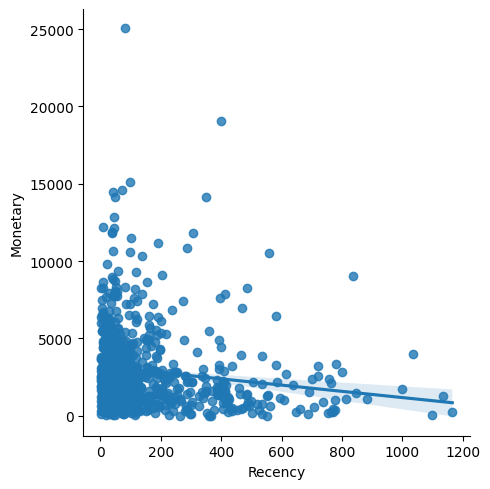

In [30]:
sns.lmplot(x='Recency', y='Monetary', data=rfm,fit_reg=True)

In [31]:
correlation_rm = rfm['Recency'].corr(rfm['Monetary'], method='spearman')
print(f"Correlation between Recency and Monetary: {correlation_rm}")

Correlation between Recency and Monetary: -0.2058908387553593


A correlation of -0.2 between Monetary (how much a customer spends) and Recency (how recently a customer made their last purchase) indicates a weak negative correlation. Here's how to interpret this result:
- Interpretation in Practice:
Some customers who spend a lot might not have purchased very recently, while others who spend less might have done so. This mixed pattern is reflected in the weak correlation.
The result could mean that other factors (like customer preferences, promotions, or seasonality) are also influencing customer spending, so Recency alone isn't a strong predictor of how much customers spend.
- Business Implications:
    - Targeting customers: You could still focus on customers who have made recent purchases since there's a slight tendency for them to spend more, but you would likely need other metrics or segmentations (e.g., Frequency or additional behavioral insights) to make more targeted decisions.
    - Customer retention: The weak correlation suggests that some valuable customers might not have purchased recently, so re-engaging them through marketing campaigns could be beneficial.

### **3. Distribution of each Metric**

**Recency Distribution**

How to interpret the Recency Distribution:

- If the recency distribution is **right-skewed**, it means that most customers have made purchases recently, signaling strong customer engagement.
- Conversely, if the distribution were **left-skewed**, this would indicate that many customers haven’t made a purchase in a long time, suggesting they are less engaged or at risk of churn.
- **Normal distribution**: This is rare for Frequency data, but if present, it means most customers make a balanced number of purchases.

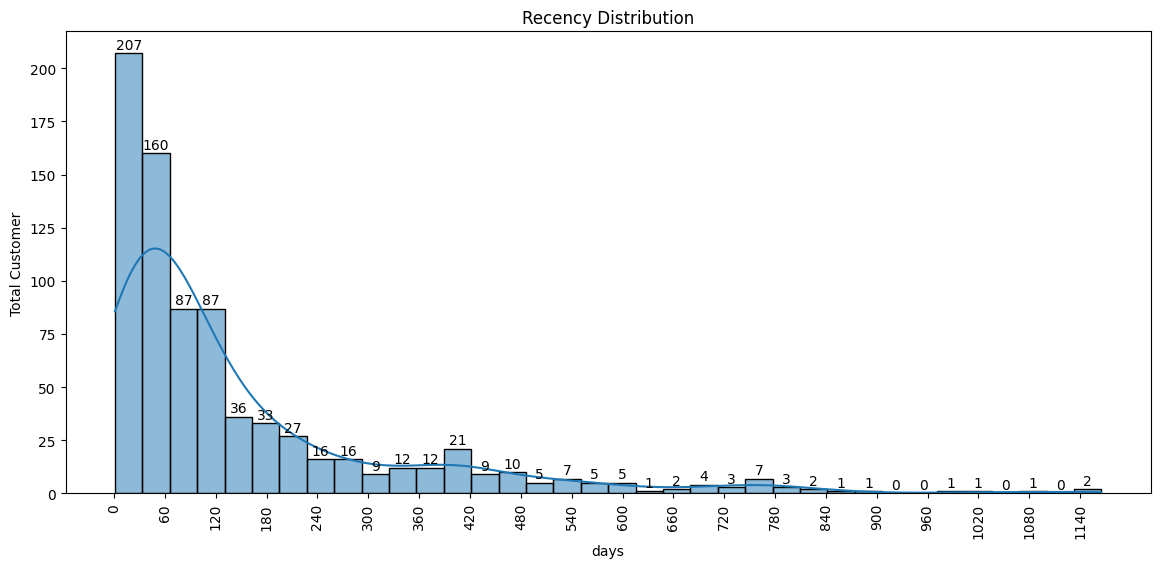

In [32]:
plt.figure(figsize=(14,6))
recent_plot = sns.histplot(rfm['Recency'], kde=True)

# Set the title
plt.title('Recency Distribution')
max_value = rfm['Recency'].max()
plt.xticks(np.arange(0, max_value + 1, 60), rotation=90)
plt.xlabel('days')
plt.ylabel('Total Customer')

# Add annotations on top of each bar
for patch in recent_plot.patches:
    # Get the height of the bar
    height = patch.get_height()
    
    # Annotate the height (value) on top of the bar
    recent_plot.annotate(f'{height:.0f}', 
                xy=(patch.get_x() + patch.get_width() / 2, height), 
                xytext=(0, 1),  # Offset the text slightly above the bar
                textcoords="offset points", 
                ha='center', va='bottom', fontsize=10)


# Display the plot
plt.show()

In the hisplot visualization above, we can interpret that the recency distribution is right-skewed. Most customers have made a recent purchase, indicated by the large number of active customers who shop in the range of 0 -120 days.

**Frequency Distribution**

How to interpret the Frequency histogram:

- Skewed to the left: If the histogram skews left, most customers have made only one or two purchases, indicating lower customer loyalty.
- Skewed to the right: If the histogram skews right, most customers make frequent purchases, suggesting a loyal customer base.
- Normal distribution: This is rare for Frequency data, but if present, it means most customers make a balanced number of purchases.

Text(0.5, 1.0, 'Recency Distribution')

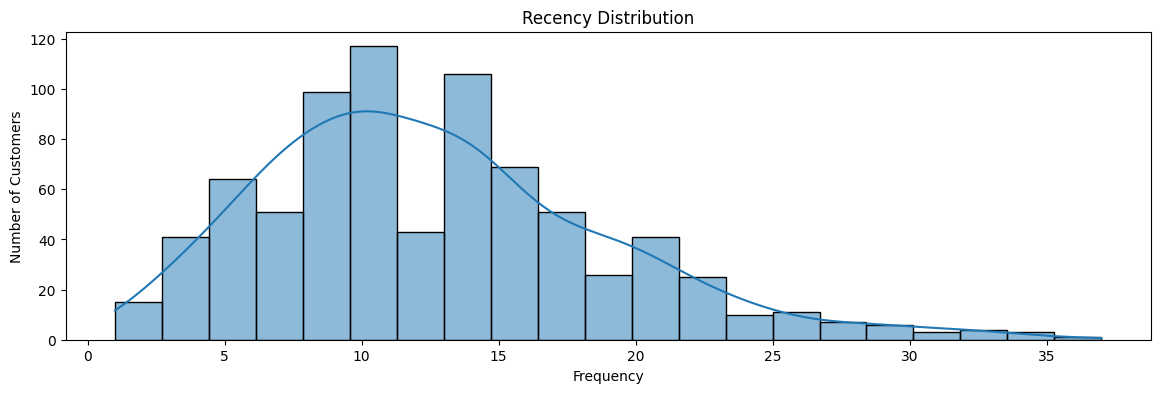

In [33]:
plt.figure(figsize=(14,4))
sns.histplot(rfm['Frequency'], kde=True)
plt.ylabel('Number of Customers')
plt.title('Recency Distribution')

The visualization above shows that the majority of customers make purchases with a similar number of 8–10 times transactions (almost normal distribution), so there is no significant difference between customers who frequently and rarely make transactions.

**Monetary Distribution**

How to interpret the Monetary histogram:

- Skewed to the left: Many customers have high total spending, indicating that a small portion of customers contributes significantly to revenue.
- Skewed to the right: A large number of customers have low total spendings, which could indicate that most customers make small purchases.
- Normal distribution: If the Monetary histogram shows a normal distribution, there’s a balance in how much customers are spending.

Text(0.5, 1.0, 'Recency Distribution')

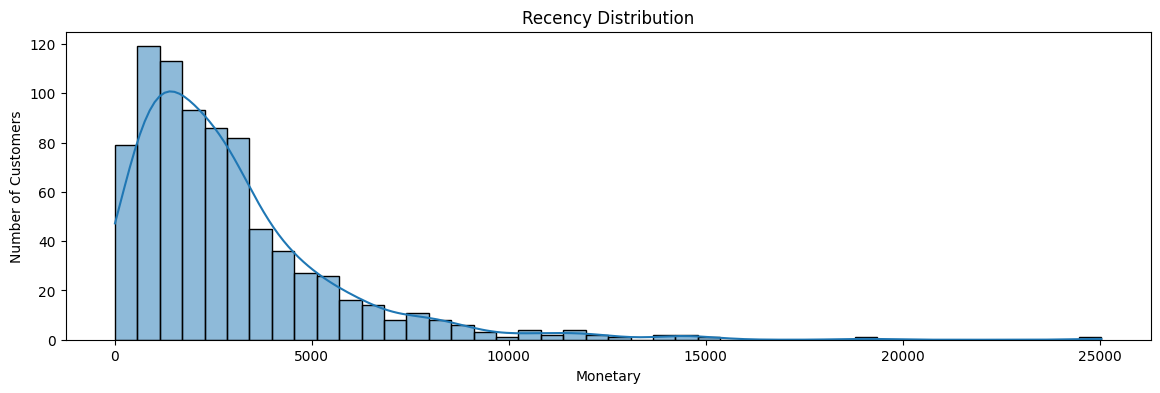

In [34]:
plt.figure(figsize=(14,4))
sns.histplot(rfm['Monetary'], kde=True)
plt.ylabel('Number of Customers')
plt.title('Recency Distribution')

in many cases, the Monetary distribution tends to be right-skewed as we see in above visualisation. This means that most customers make lower-value purchases between 0 - $5000, while only a few contribute significantly with high-value purchases.

### **4. Checking and Handling Outliers**

when segmenting customers using K-Means, it is important to handle outliers. Outliers can significantly impact the results of K-Means clustering. K-Means works by minimizing the variance within each cluster, and since outliers are extreme values, they can distort the clustering process by pulling centroids toward them. This can lead to:
- Misleading clusters: The presence of outliers may result in clusters that do not accurately represent the main group of data points.
- Unbalanced clusters: Outliers can cause some clusters to be too small or large, affecting the quality of the segmentation.

**4.a. Chechking Outliers**

Skewness of Recency: 2.2739700283328497
Kurtosis of Recency: 5.808577255898836


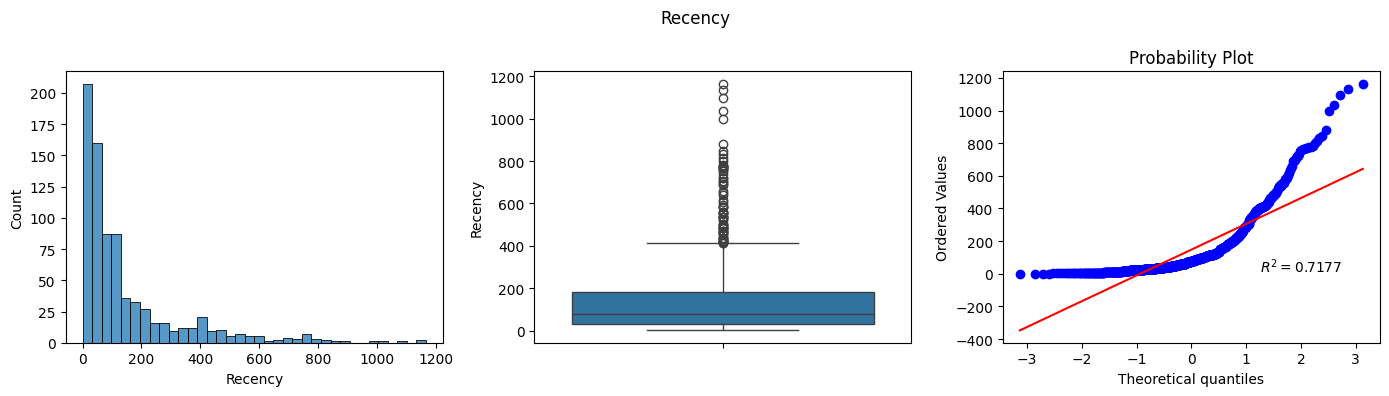

Skewness of Frequency: 0.7749072523925808
Kurtosis of Frequency: 0.6652428604320866


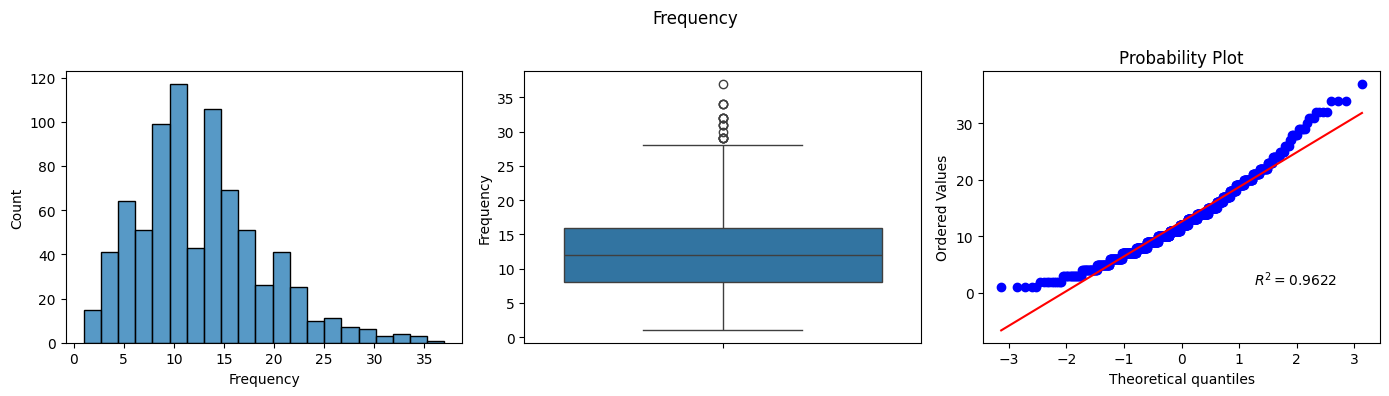

Skewness of Monetary: 2.4765553972051815
Kurtosis of Monetary: 10.658932308056496


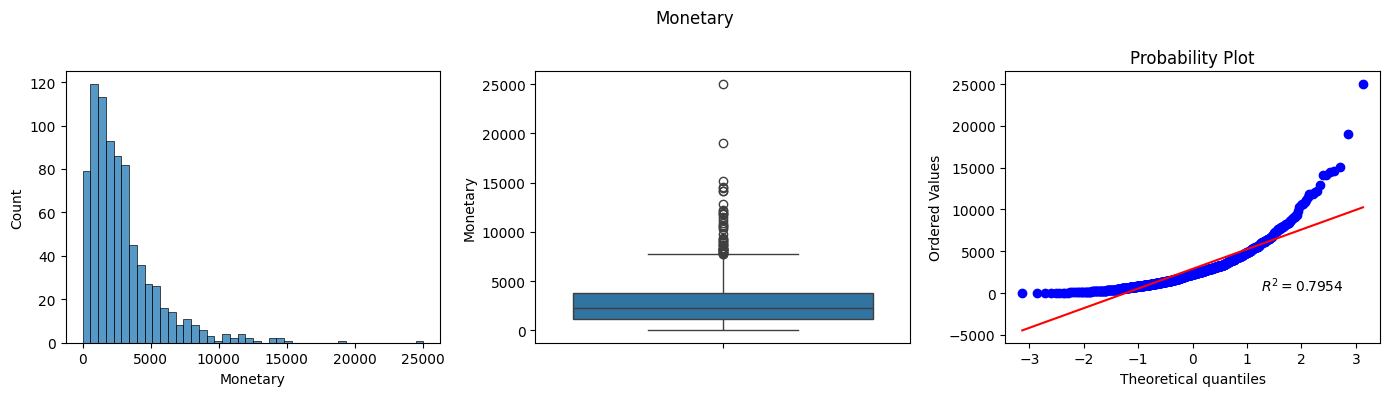

In [35]:
for col in rfm.select_dtypes(np.number).columns:
    print(f"Skewness of {col}:",rfm[col].skew())
    print(f"Kurtosis of {col}:",rfm[col].kurtosis())
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.histplot(rfm[col])
    plt.subplot(132)
    sns.boxplot(rfm[col])
    plt.subplot(133)
    stats.probplot(rfm[col],plot=plt,rvalue=True,dist='norm')
    plt.suptitle(col)
    plt.tight_layout()
    plt.show();

In [36]:
# Calculate Outliers Value
def deteksi_outlier(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [37]:
nilai_outliers = []

kolom = ['Recency', 'Frequency', 'Monetary']

for feature in kolom :
    outliers, lower_bound, upper_bound = deteksi_outlier(rfm, feature)
    total_outlier = len(outliers)
    outlier_percentage = round(total_outlier / len(rfm[kolom]) * 100, 2)
    nilai_outliers.append([feature, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_summary = pd.DataFrame(nilai_outliers, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
outlier_summary

,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,Recency,74,9.33,-198.500,413.500
1,Frequency,17,2.14,-4.000,28.000
2,Monetary,43,5.42,-2812.789,7744.115


**4.b. Handling Outliers**

Handle Outlies using Winsorization. The advantages of using winsorization :

- By capping extreme values rather than removing them, Winsorization minimizes the risk of introducing bias that can occur when outliers are arbitrarily discarded. This leads to a more representative analysis of the dataset.
- This technique retains all data points by capping the outliers to a specified percentile range (e.g., replacing values above the 95th percentile with the 95th value). As a result, the dataset remains intact without losing any information.


In [38]:
# Handle extrem values in Recency and Frequency
rfm['Recency'].max() , rfm['Monetary'].max(), rfm['Frequency'].max() 


(1165, 25043.05, 37)

In [39]:
# # import library winorization
from scipy.stats.mstats import winsorize

rfm['Recency'] = winsorize(rfm['Recency'], limits=[0.02, 0.02])
rfm['Monetary'] = winsorize(rfm['Monetary'], limits=[0.02, 0.02])
rfm['Frequency'] = winsorize(rfm['Frequency'], limits=[0.02, 0.02])


In [40]:
rfm['Recency'].max() , rfm['Monetary'].max(), rfm['Frequency'].max()

(765, 10880.546, 29)

### **5. Scaling**

Apply scaling techniques (e.g., Min-Max scaling or Standardization) to normalize the data and ensure that all features contribute equally to the clustering process.

In [41]:
clustering_rfm = rfm[['Recency',"Frequency","Monetary"]].copy()
clustering_rfm.head()

,Recency,Frequency,Monetary
Customer_ID,,,
AA-10315,185,11,5563.560
AA-10375,20,15,1056.390
AA-10480,260,12,1790.512
AA-10645,56,18,5086.935
AB-10015,416,6,886.156


In [42]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(clustering_rfm)
data_scaled = pd.DataFrame(x_scaled,columns=['Recency','Frequency','Monetary'])
data_scaled.head()

,Recency,Frequency,Monetary
0,0.238845,0.307692,0.505685
1,0.022310,0.461538,0.086657
2,0.337270,0.346154,0.154908
3,0.069554,0.576923,0.461373
4,0.541995,0.115385,0.070831


### **6. Define K (cluster)**

#### **Elbow Method**

The elbow method is a technique used to determine the optimal number of clusters in a dataset when performing clustering, particularly with the K-Means algorithm. The basic idea is to run the K-Means algorithm with different values of k (the number of clusters) and then plot the explained inertia/within-cluster sum of squares against the number of clusters.

In [43]:
wscc = []
for i in range(2,10):
    elbow = KMeans(n_clusters=i, init="k-means++",random_state=0)
    elbow.fit(data_scaled)
    wscc.append(elbow.inertia_)

In [44]:
df_cluster = pd.DataFrame()
df_cluster['n_clusters'] = range(2, 10)
df_cluster['inertia'] =  wscc
df_cluster

,n_clusters,inertia
0,2,77.341702
1,3,50.730453
2,4,39.698035
3,5,33.969249
4,6,30.483882
5,7,26.658972
6,8,24.045501
7,9,22.036974


<Axes: xlabel='n_clusters', ylabel='inertia'>

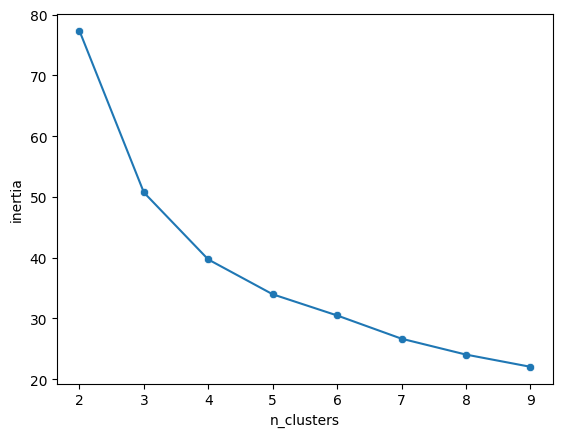

In [45]:
# buat elbow plotnya
sns.scatterplot(data=df_cluster, x='n_clusters', y='inertia')
sns.lineplot(data=df_cluster, x='n_clusters', y='inertia')


Define optimum cluster:

The optimal number of clusters is typically found at the "elbow" point in the graph, where the decrease in inertia slows down significantly.

Before the elbow, adding more clusters improves the fit significantly, but after the elbow, additional clusters don't improve the fit by much:
- K= 1 to K =2: Significant drop in inertia, indicating that adding clusters is improving the model considerably.
- K= 3: The curve starts to flatten out, suggesting the beginning of the elbow point.
- K= 4 onwards: The decrease in inertia becomes much less pronounced. This is where you would consider k=4 as the optimal number of clusters.

**K = 3 is the optimum cluster**

#### **Silhouette Score**

The Silhouette Score ranges from -1 to 1. A score close to 1 indicates that the points are well-clustered, while a score close to 0 suggests overlapping clusters. Negative values indicate that the points may have been assigned to the wrong cluster

In [46]:
from sklearn.metrics import silhouette_score

In [47]:
list_score = []

for i in range(2, 10):
    # modeling k-means
    silhouette = KMeans(n_clusters=i, init="k-means++",random_state=0)

    # fit
    silhouette.fit(data_scaled)

    # labels
    cluster = silhouette.labels_
    # score
    score = silhouette_score(data_scaled,
                 labels=cluster,
                 random_state=0)
    list_score.append(score)

In [48]:
df_cluster['silhouette'] = list_score
df_cluster.sort_values(by='silhouette', ascending=False)

,n_clusters,inertia,silhouette
1,3,50.730453,0.387166
2,4,39.698035,0.351198
0,2,77.341702,0.345686
3,5,33.969249,0.311548
5,7,26.658972,0.299479
4,6,30.483882,0.296632
7,9,22.036974,0.293313
6,8,24.045501,0.291250


Both Elbow Method and Silhouette scoring, the result of K (cluster) optimum is 3 clusters.

### **7. Apply K-Means clustering to segment customers.**

In [49]:
#Clustering dengan mengunakan Kmeans.
kmeans = KMeans(n_clusters=3, random_state=0,init='k-means++',
                n_init =10,max_iter = 300).fit(data_scaled)
pred = kmeans.predict(data_scaled)
rfm['Cluster']=kmeans.labels_
rfm.head(5)

,Recency,Frequency,Monetary,Cluster
Customer_ID,,,,
AA-10315,185,11,5563.560,0
AA-10375,20,15,1056.390,2
AA-10480,260,12,1790.512,2
AA-10645,56,18,5086.935,0
AB-10015,416,6,886.156,1


### **Analyze and Interpret Customer Segments.**

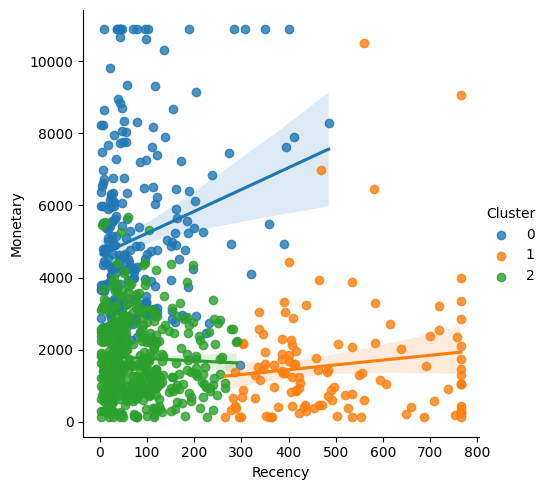

In [50]:
sns.lmplot(x='Recency', y='Monetary', data=rfm, hue='Cluster', fit_reg=True)

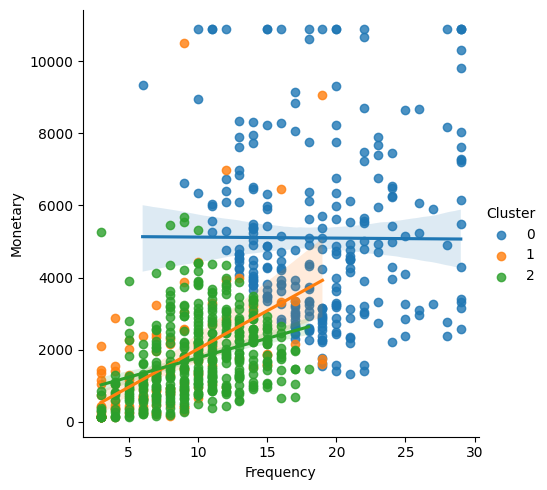

In [51]:
sns.lmplot(x='Frequency', y='Monetary', data=rfm, hue='Cluster')

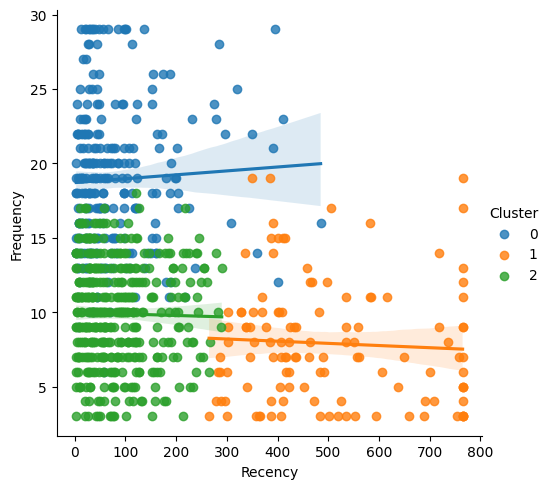

In [52]:
sns.lmplot(x='Recency', y='Frequency', data=rfm, hue='Cluster', fit_reg=True)

From the results of the analysis, 3 clusters were obtained. namely cluster 0 as Champion segment, cluster 2 as Potential loyalists segment and cluster 1 as can't lose them segment. 
- Look closely, can't lose them segment (cluster 1) has high recency with low frequency and low monetary value. This indicates that customers in this group have been around for a long time and rarely make transactions, so customers spend low money. 
- Champion segment (cluster 0) has the smallest recency with the highest frequency and monetary value. This means that customers in this group still make a recent and frequently transactions so that the money spent by customers is very high. 
- Meanwhile, Potential Loyalists (cluster 2) has an average recency, frequency and monetary value between clusters 1 and 2. This indicates that the customers in this group are customers who do not infrequently carry out transactions with not much spent money.

In [53]:
def customer_segmentation(x): 
    if x == 0:
        return "Champion"
    if x == 2:
        return "Potential Loyalists"
    else:
        return "Can't Lose Them"

In [54]:
rfm['Cluster Name'] = rfm['Cluster'].apply(customer_segmentation)
rfm.head(5)

,Recency,Frequency,Monetary,Cluster,Cluster Name
Customer_ID,,,,,
AA-10315,185,11,5563.560,0,Champion
AA-10375,20,15,1056.390,2,Potential Loyalists
AA-10480,260,12,1790.512,2,Potential Loyalists
AA-10645,56,18,5086.935,0,Champion
AB-10015,416,6,886.156,1,Can't Lose Them


Text(0.5, 1.0, 'Customer Segmentation Distribution Based on Purchase Behavior')

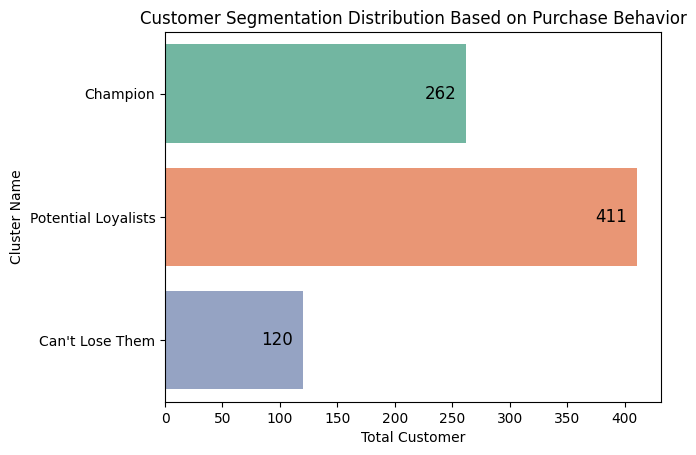

In [55]:
cus_segment = sns.countplot(data=rfm,
              y='Cluster Name', palette='Set2')

for bar in cus_segment.patches:
    cus_segment.annotate(format(bar.get_width(), '.0f'),
                           (bar.get_width(), 
                            bar.get_y() + bar.get_height() / 2), 
                           ha='left', va='center', 
                           size=12, xytext=(-30, 0), 
                           textcoords='offset points')

plt.xlabel('Total Customer')
plt.title('Customer Segmentation Distribution Based on Purchase Behavior')

the highest customer segmentation in Super Store Company is Potential loyalists with total customer 411. Second place belongs to Champion segment with total customer 262, while the can't lose them segment has the third position with total customer 120. The ideas are:
- how to reactive customer in the "can't lose them" segment, so they can move to Potential Loyalists Segment.
- help Potential Loyalists transition to the Champion segment level.
- retaining customers in the Champion segment to prevent them from experiencing a downgrade level.

### **8. Recommendation**

**Loyalty Program**

Designing loyalty program that reward customer based on their level of segment.
- **a. Champion**:
    - Early access to a new products with 5 - 10% discount in period time.
    - Offer an exclusive 10% discount for every transaction with a certain amount of money.
    - Invite to Exclusive Events: Organize VIP-only events (either online or offline) to strengthen the relationship.
    - Create loyalty cards in which they can gain points each time they purchase from your brand. Each Product Category gain a different point.
    - A special gift for customers on their birthday.

- **b. Potential Loyalists**:
    - Offer an exclusive 5% discount for every transaction with a certain amount of money.
    - Create loyalty cards in which they can gain points each time they purchase from your brand. Each Product Category gain a different point.

- **c. Can't Lose Them**:
    - Engage them with reactivation campaigns, remind them of the benefits of your products, and offer incentives for their return.
    - Know what went wrong with the segment and try not to lose them to competition by running surveys, talking to them, and making them feel valued. 
